In [1]:
# libreria para trabajar con mapas 
import folium 
import pandas as pd

In [2]:
# Primero creamos el mapa con la libreria folium y la funcion Map,tiles es el proveedor del mapa.
#El mapa esta centrado en valdivia
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

#Aca estoy cargando el set de datos que subi a la carpeta.
df = pd.read_excel('base_ssr.xlsx', sheet_name='Sistemas_APR',usecols="B:U",skiprows=2)
df

df_lat=df.iloc[1963:1977,19] 
df_long=df.iloc[1963:1977,18]

df_nombres=df.iloc[1963:1977,12]
df_nombres

nombres = list(df_nombres)
nombres

locations = list(zip(df_lat, df_long))
locations


#Aca agregamos un marcador con la ubicación de valdivia
for i in range(len(locations)):
    nombre=nombres[i]
    folium.Marker(location=locations[i],popup="<i>Punto de prueba</i>",tooltip=nombre).add_to(map)


for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=5).add_to(map)
map

# Aca estoy agregando un minimap en la esquina,para esto hay que cargar la funcion plugins desde la libreria folium
from folium import plugins
minimap = plugins.MiniMap()
map.add_child(minimap)
map


In [3]:
# Aca estoy cargando el archivo excel completo,para eso primero cargo la libreria pandas
#si no la tienes --> py -m pip install pandas, despues te podria lanzar algun error entonces tambien instala py -m pip install openpyxl
import pandas as pd

#Aca estoy cargando el set de datos que subi a la carpeta.
#df = pd.read_excel('base_ssr.xlsx', sheet_name='Sistemas_APR',usecols="B:U",skiprows=2)
#df

#df_lat=df.iloc[1964:1977,19] 
#df_long=df.iloc[1964:1977,18]

#locations = list(zip(df_lat, df_long))
#locations

In [4]:
from folium import plugins
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

df_beneficio=df.iloc[1963:1977,9]
beneficio = list(df_beneficio)

colormap = folium.StepColormap(colors=['green','yellow','orange','red','purple'] ,
                           index=[121,298,546,964,2294,4021],
                           vmin= 121,
                           vmax=4021)
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)
for i in range(len(locations)):
    folium.Circle(location=locations[i],radius=100,color=colormap(beneficio[i]),).add_to(map)
    nombre=nombres[i]
map

In [26]:
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

color_beneficiario=[]

for j in range(len(locations)):
    u=beneficio[j]
    if u<299:
        colores='darkred'
    if u>=299 and u<546:
        colores='green'
    if u>=546 and u<964:
        colores='orange'
    if u>=964 and u<2294:
        colores='red'               
    if u>=2294:
        colores='darkpurple'
    color_beneficiario.append(colores)
    folium.Marker(
    location=locations[j],
    popup="Punto",
    tooltip=nombres[j],
    icon=folium.Icon(color=colores),
).add_to(map)
    
map

In [6]:
#Lista de colores
#  'green', 'gray', 'darkred', 'lightblue', 'lightgray', 'pink', 'darkpurple', 'white', 'orange', 'beige', 
#'cadetblue', 'lightgreen', 'lightred', 'red', 'blue', 'black', 'darkblue', 'darkgreen', 'purple'

In [7]:
import pandas as pd
df = pd.DataFrame()
df['Nombre Ubicación'] = None
df['Beneficiarios']=None
df['Color']=None

nombres = list(df_nombres)

beneficio = list(df_beneficio)
color_b=list(color_beneficiario)

df['Nombre Ubicación'] = nombres
df['Beneficiarios'] = beneficio
df['Color'] = color_b

print(df)

            Nombre Ubicación  Beneficiarios       Color
0                  PISHUINCO          322.0       green
1                  CURIÑANCO         2294.0         red
2                 HUELLELHUE          310.0       green
3               LAS GAVIOTAS         1048.0         red
4         NIEBLA-LOS MOLINOS         4021.0  darkpurple
5                   PUNUCAPA          459.0       green
6   SAN IGNACIO-PLAYA ROSADA          936.0      orange
7               TRES ESPINOS         1091.0         red
8             VILLA CAYUMAPU         1327.0         red
9     EL ARENAL SANTA ELVIRA          549.0      orange
10                   PAILLAO          871.0      orange
11               CABO BLANCO          543.0       green
12            EL ARENAL KM 2          623.0      orange
13                 Chabelita          434.0       green


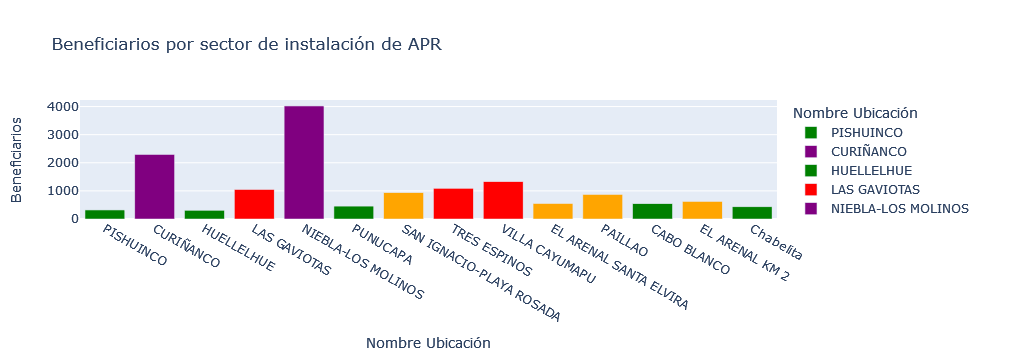

In [29]:
import plotly.express as px
#Aca estamos llamando al set de datos de la tabla,que viene precargado en la librería

fig = px.bar(df, x="Nombre Ubicación", y="Beneficiarios",color="Nombre Ubicación",
             color_discrete_sequence=["green", "purple", "green", "red", "purple","green",
                                      "orange", "red", "red", "orange", "orange", "green", "orange", "green"],title="Beneficiarios por sector de instalación de APR")
fig.show()
